## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).


In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not. 

### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For caterogiral features, replace them with 'NA'
    * For numerical features, replace with with 0.0 


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`


In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

--2025-10-17 06:28:07--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.03s   

2025-10-17 06:28:08 (2.31 MB/s) - ‘course_lead_scoring.csv’ saved [80876/80876]



In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [19]:
target = 'converted'

In [20]:
df = pd.read_csv('course_lead_scoring.csv')

In [21]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [22]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [23]:
categorical = [c for c in df.columns if df[c].dtype == 'object']
categorical

['lead_source', 'industry', 'employment_status', 'location']

In [24]:
numerical = [c for c in df.columns if df[c].dtype != 'object']
numerical

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score',
 'converted']

In [25]:
#removing the target from numerical
numerical = [c for c in numerical if c != target]
numerical

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

In [26]:
df[categorical] = df[categorical].fillna( 'NA')
df[numerical] = df[numerical].fillna(0.0)

In [27]:
df.isna().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [28]:
df_train_full, df_test, y_train_full, y_test = train_test_split(df, df[target].values, test_size=0.2, random_state=1)

In [29]:
df_train, df_val, y_train, y_val = train_test_split(df_train_full, y_train_full, test_size=0.25, random_state=1)

In [30]:
len(df_train), len(y_train), len(df_val), len(y_val)

(876, 876, 293, 293)

In [31]:
del(df_train_full[target])
del(df_train[target])
del(df_val[target])

In [32]:
df_train.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
462,events,manufacturing,2,95543.0,unemployed,europe,3,0.78
135,referral,NA,1,54924.0,student,south_america,6,0.39
117,organic_search,healthcare,2,77352.0,unemployed,europe,2,0.22
1051,paid_ads,other,2,34600.0,employed,south_america,2,0.31
945,paid_ads,education,0,43615.0,unemployed,south_america,2,0.01


In [33]:
df_train_full.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
98,referral,NA,1,56659.0,employed,asia,4,0.75
1188,social_media,education,2,66171.0,unemployed,north_america,2,0.66
1407,events,finance,1,66523.0,self_employed,europe,3,0.64
1083,social_media,finance,1,56746.0,student,north_america,3,0.98
404,referral,NA,0,55449.0,student,australia,4,0.47


### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['balance']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `lead_score`
- `number_of_courses_viewed`
- `interaction_count`
- `annual_income`

In [34]:
from sklearn.metrics import roc_auc_score

In [35]:
for f in numerical:
    auc_score = roc_auc_score(y_train, df_train[f])
    if auc_score < 0.5:
        auc_score *= -1

    print(f'feature: {f} ---> roc_auc_feature_importance: {auc_score}')

feature: number_of_courses_viewed ---> roc_auc_feature_importance: 0.7635680590007088
feature: annual_income ---> roc_auc_feature_importance: 0.5519578313253012
feature: interaction_count ---> roc_auc_feature_importance: 0.738270176293409
feature: lead_score ---> roc_auc_feature_importance: 0.6144993577250176


ans: number_of_courses_viewed

### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.32
- 0.52
- 0.72
- 0.92


In [37]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [45]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
auc_score = roc_auc_score(y_val, y_pred)
print(f'auc on validation set: {auc_score:.3f}')

auc on validation set: 0.817


In [41]:
abs(0.72 - auc_score)

0.09713162688141119

In [42]:
abs(0.92 - auc_score)

0.10286837311858887

ans: I am unsure of this one because it is seeminly between two answers, but the closer one would be 0.72

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.145
* 0.345
* 0.545
* 0.745



In [67]:
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

In [50]:
thresholds = np.linspace(0, 1, 101)

In [51]:
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [61]:
prec_scores = []
rec_scores = []
abs_diff_scores = []

for t in thresholds:
    
    prec = precision_score(y_val, (y_pred >= t), zero_division=0)
    prec_scores.append(prec)
    
    rec = recall_score(y_val, (y_pred >= t))
    rec_scores.append(rec)

    abs_diff = abs(prec - rec)
    abs_diff_scores.append(abs_diff)
    

In [68]:
df_scores = pd.DataFrame({"threshold": thresholds, "precision": prec_scores, "recall": rec_scores,
                         'abs_difference': abs_diff_scores})
df_scores.sort_values('abs_difference', ascending=True).head(10)

,threshold,precision,recall,abs_difference
100,1.00,0.000000,0.000000,0.000000
99,0.99,0.000000,0.000000,0.000000
98,0.98,0.000000,0.000000,0.000000
64,0.64,0.779070,0.783626,0.004556
65,0.65,0.778443,0.760234,0.018209
63,0.63,0.763736,0.812865,0.049129
66,0.66,0.779874,0.725146,0.054728
62,0.62,0.760638,0.836257,0.075619
67,0.67,0.797386,0.713450,0.083935
61,0.61,0.747475,0.865497,0.118022


In [72]:
abs(0.545 - 0.64)

0.09499999999999997

In [73]:
abs(0.745 - 0.64)

0.10499999999999998

ans: The threshold where the difference between precision and recall was the smallest was 0.64, that is almost in the middle of two choices for answers but it is slightly closer to 0.545, so that is my answer.  However, the fact that this is yet another question where the answer I get is almost prefectly betwen two choices offered in the multiple choice makes me think I am doing someting wrong.  i would think the anser should be more obviously closer to one of the choices.

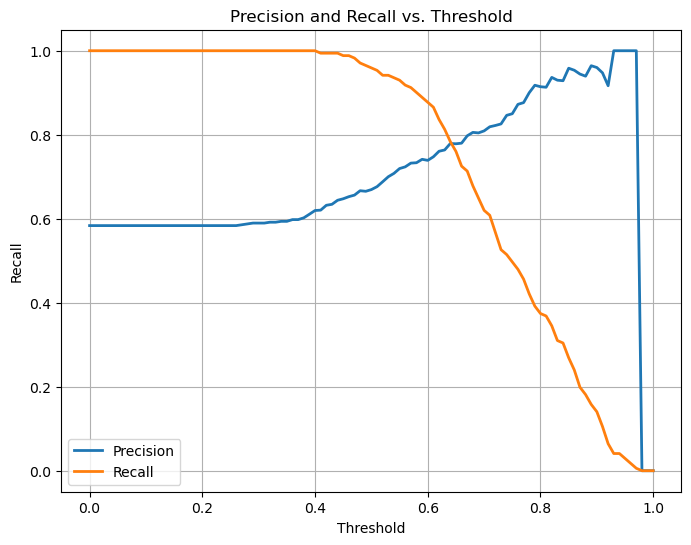

In [71]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, prec_scores, label='Precision', linewidth=2)
plt.plot(thresholds, rec_scores, label='Recall', linewidth=2)

plt.xlabel("Threshold")
plt.ylabel("Recall")
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.14
- 0.34
- 0.54
- 0.74

In [74]:
df_scores['F1_scores'] = (2 * (df_scores['precision'] * df_scores['recall']) / (df_scores['precision'] + df_scores['recall']))

In [76]:
df_scores.sort_values('F1_scores', ascending=False)

,threshold,precision,recall,abs_difference,F1_scores
57,0.57,0.732394,0.912281,0.179886,0.812500
55,0.55,0.719457,0.929825,0.210368,0.811224
56,0.56,0.723502,0.918129,0.194626,0.809278
59,0.59,0.741463,0.888889,0.147425,0.808511
58,0.58,0.733333,0.900585,0.167251,0.808399
...,...,...,...,...,...
96,0.96,1.000000,0.017544,0.982456,0.034483
97,0.97,1.000000,0.005848,0.994152,0.011628
98,0.98,0.000000,0.000000,0.000000,NaN
99,0.99,0.000000,0.000000,0.000000,NaN


In [77]:
# Find the index of the maximum F1 score
best_idx = df_scores['F1_scores'].idxmax()

# Get the threshold and F1 score at that index
best_threshold = df_scores.loc[best_idx, 'threshold']
best_f1 = df_scores.loc[best_idx, 'F1_scores']

print(f"Best threshold: {best_threshold}, F1 score: {best_f1:.3f}")

Best threshold: 0.5700000000000001, F1 score: 0.812


In [82]:
best_idx = df_scores['F1_scores'].idxmax()

best_threshold = df_scores.loc[best_idx, 'threshold']
best_threshold

np.float64(0.5700000000000001)

ans: the closest answer for the threshold where the F1 score is the greatrest is 0.54

### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.36

In [ ]:
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)
2
print(kf)
KFold(n_splits=2, random_state=None, shuffle=False)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

In [83]:
from sklearn.model_selection import KFold

In [84]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)
kf.get_n_splits(df_train_full)

5

In [117]:
# replitting the iniitial dataframe (witht he same random_state so it should bbe the same as it was), nut this time not 
# eleiminating the target yet

df_train_full, df_test, y_train_full, y_test = train_test_split(df, df[target].values, test_size=0.2, random_state=1)

In [124]:
auc_scores_cv = []

for i, (train_index, val_index) in enumerate(kf.split(df_train_full)):
    df_train = df_train_full.iloc[train_index]
    df_val = df_train_full.iloc[val_index]

    y_train = df_train[target].values
    y_val = df_val[target].values

    del df_train[target]
    del df_val[target]

    dv = DictVectorizer(sparse=False)

    train_dicts = df_train.to_dict(orient='records')
    val_dicts = df_val.to_dict(orient='records')

    X_train = dv.fit_transform(train_dicts)
    X_val = dv.transform(val_dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print(f"fold: {i} ----> auc_score: {auc}")
    auc_scores_cv.append(auc)
    

    

    

fold: 0 ----> auc_score: 0.8060745924216483
fold: 1 ----> auc_score: 0.8713738368910783
fold: 2 ----> auc_score: 0.7754320118852139
fold: 3 ----> auc_score: 0.8018368617683685
fold: 4 ----> auc_score: 0.8558272713202291


In [125]:
np.std(auc_scores_cv)

np.float64(0.03580711942905165)

ans: again the choices don't appear very close to the answer I got but the closest was 0.06

### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

In [130]:
for C in [0.000001, 0.001, 1]:
    auc_scores = []
    kf = KFold(n_splits=5, shuffle=True, random_state=1)
    print(f"C: {C}")
    print()

    for i, (train_index, val_index) in enumerate(kf.split(df_train_full)):
        df_train = df_train_full.iloc[train_index]
        df_val = df_train_full.iloc[val_index]
    
        y_train = df_train[target].values
        y_val = df_val[target].values
    
        del df_train[target]
        del df_val[target]
    
        dv = DictVectorizer(sparse=False)
    
        train_dicts = df_train.to_dict(orient='records')
        val_dicts = df_val.to_dict(orient='records')
    
        X_train = dv.fit_transform(train_dicts)
        X_val = dv.transform(val_dicts)
    
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print(f"    fold: {i} ----> auc_score: {auc}")
        auc_scores.append(auc)

    print(f"mean_auc: {np.mean(auc_scores):.3f}")
    print(f"auc_std: {np.std(auc_scores):.3f}")
    print()

    

C: 1e-06

    fold: 0 ----> auc_score: 0.5572098563239782
    fold: 1 ----> auc_score: 0.5191961842208147
    fold: 2 ----> auc_score: 0.5894909688013137
    fold: 3 ----> auc_score: 0.5582191780821917
    fold: 4 ----> auc_score: 0.5769230769230769
mean_auc: 0.560
auc_std: 0.024

C: 0.001

    fold: 0 ----> auc_score: 0.8608650338718081
    fold: 1 ----> auc_score: 0.8967081085307685
    fold: 2 ----> auc_score: 0.822816482915005
    fold: 3 ----> auc_score: 0.8539850560398504
    fold: 4 ----> auc_score: 0.9000154774802662
mean_auc: 0.867
auc_std: 0.029

C: 1

    fold: 0 ----> auc_score: 0.8060745924216483
    fold: 1 ----> auc_score: 0.8713738368910783
    fold: 2 ----> auc_score: 0.7754320118852139
    fold: 3 ----> auc_score: 0.8018368617683685
    fold: 4 ----> auc_score: 0.8558272713202291
mean_auc: 0.822
auc_std: 0.036



ans: a C of 0.001 gives the best mean roc_auc_score